# Import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib qt5
%matplotlib inline

# read the dataset 

In [2]:
df = pd.read_csv('C:/Users/Asus/Desktop/survey2.csv')
df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,No,No,No,Rarely,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,26,Male,United Kingdom,No,No,Yes,NaN,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1245,32,Male,United States,No,Yes,Yes,Often,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1246,34,Male,United States,No,Yes,Yes,Sometimes,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1247,46,Female,United States,No,No,No,NaN,Yes,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [3]:
# Check the dataset and gather general information
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,No,No,No,Rarely,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [4]:
df.shape # 1249 record(observation)
#23 columns (features) the last one is the response (goal,pendent) variable

(1249, 23)

In [5]:
df.dtypes # the first column is Numeric(integer) and the rest are Nominal

Age                           int64
Gender                       object
Country                      object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
dtype: object


# pre-processing

In [6]:
df['Gender'].value_counts() # pay attention
#replace Female = 0 , Male = 1 , Other = 2

Male       987
Female     245
Other       12
Male         3
Female       2
Name: Gender, dtype: int64

In [7]:
df.Country.value_counts() #this column is not good for our modeling because most of the datas are from us and uk and for other cuntries we cant predict correctly
# So we decide to drop this column 

United States             748
United Kingdom            183
Canada                     70
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
Brazil                      6
Belgium                     6
South Africa                6
Israel                      5
Bulgaria                    4
Singapore                   4
Mexico                      3
Finland                     3
Austria                     3
Colombia                    2
Portugal                    2
Croatia                     2
Greece                      2
Russia                      2
Denmark                     2
Latvia                      1
Bosnia and Herzegovina      1
Norway                      1
China                       1
Philippine

In [8]:
df.self_employed.value_counts()#replace self_employed  , remote_work , tech_company , ( No=0  Yes=1 )

No     1107
Yes     142
Name: self_employed, dtype: int64

In [9]:
df.work_interfere.value_counts() # 263 NA in this variable (pay attention)
#replace Never=4 Rarely=3 Sometimes=2 Often=1

Sometimes    460
Never        213
Rarely       172
Often        141
Name: work_interfere, dtype: int64

In [10]:
df.benefits.value_counts() #replace  benefits , wellness_program , seek_help , anonymity ( No=0 Don't know=1 Yes=2   )

Yes           471
Don't know    406
No            372
Name: benefits, dtype: int64

In [11]:
df.care_options.value_counts() #replace No=0 Not sure=1 Yes=2

No          499
Yes         436
Not sure    314
Name: care_options, dtype: int64

In [12]:
df.leave.value_counts()
#replace ( Don't know=0 Very easy=4 Somewhat easy=3  Somewhat difficult=2 Very difficult=1 )

Don't know            560
Somewhat easy         265
Very easy             204
Somewhat difficult    125
Very difficult         95
Name: leave, dtype: int64

In [13]:
df.mental_health_consequence.value_counts() 
#( Yes=0 Maybe=1 No=2 )

No       489
Maybe    476
Yes      284
Name: mental_health_consequence, dtype: int64

In [14]:
df.phys_health_consequence.value_counts() # this variable is not important because our dataset is about mental health but this variable is about phys health

No       922
Maybe    269
Yes       58
Name: phys_health_consequence, dtype: int64

In [15]:
df.coworkers.value_counts()
##replace ( No=0 Some of them=1 Yes=2 )

Some of them    771
No              256
Yes             222
Name: coworkers, dtype: int64

In [16]:
df.supervisor.value_counts()
##replace ( No=0 Some of them=1 Yes=2 )

Yes             513
No              387
Some of them    349
Name: supervisor, dtype: int64

In [17]:
df.mental_health_interview.value_counts()
#replace ( Yes=0 Maybe=1 No=2 )

No       1002
Maybe     207
Yes        40
Name: mental_health_interview, dtype: int64

In [18]:
df.phys_health_interview.value_counts() # this variable is not important because our dataset is about mental health but this variable is about phys health

Maybe    553
No       498
Yes      198
Name: phys_health_interview, dtype: int64

In [19]:
df.mental_vs_physical.value_counts()
#replace ( Yes=0 Maybe=1 No=2 )

Don't know    573
Yes           340
No            336
Name: mental_vs_physical, dtype: int64

In [20]:
df.obs_consequence.value_counts() # Our Response variable
#replace ( No=1  Yes=0 )  #obs_consequence , family_history ,  treatment

No     1069
Yes     180
Name: obs_consequence, dtype: int64

In [96]:
df.corr()

,Age
Age,1.0


## Handle Categorical Datas

In [21]:
#Replacing Gender
df2 = df.replace({'Gender':'Female'},0).replace({'Gender':'Male'},1).replace({'Gender':'Other'},2).replace({'Gender':'Female '},0).replace({'Gender':'Male '},1)

In [22]:
df2['Gender'].value_counts() 

1    990
0    247
2     12
Name: Gender, dtype: int64

In [23]:
df2.drop(["Country","phys_health_consequence","phys_health_interview"], axis = 1,inplace = True)
# delete not important variables 

In [24]:
#replacing another cat variables
df3=df2.replace({"self_employed" : "No"},0).replace({"self_employed" : "Yes"},1).replace({"family_history" : "No"},0).replace({"family_history" : "Yes"}, 1).replace({"treatment" : "No"}, 0).replace({"treatment" : "Yes"}, 1).replace({"work_interfere" : "Sometimes"},2).replace({"work_interfere" : "Never"},4).replace({"work_interfere" : "Rarely"},3).replace({"work_interfere" : "Often"},1).replace({"remote_work" : "No"}, 0).replace({"remote_work" : "Yes"}, 1).replace({"tech_company" : "No"}, 0).replace({"tech_company" : "Yes"}, 1).replace({"benefits" : "No"}, 0).replace({"benefits" : "Yes"}, 2).replace({"benefits" : "Don't know"}, 1).replace({"care_options" : "No"}, 0).replace({"care_options" : "Yes"}, 2).replace({"care_options" : "Not sure"}, 1).replace({"wellness_program" : "No"}, 0).replace({"wellness_program" : "Yes"}, 2).replace({"wellness_program" : "Don't know"}, 1).replace({"seek_help" : "No"}, 0).replace({"seek_help" : "Yes"}, 2).replace({"seek_help" : "Don't know"}, 1).replace({"anonymity" : "No"}, 0).replace({"anonymity" : "Yes"}, 2).replace({"anonymity" : "Don't know"}, 1).replace({"leave" : "Don't know"}, 0).replace({"leave" : "Somewhat easy"}, 3).replace({"leave" : "Very easy"}, 4).replace({"leave" : "Somewhat difficult"}, 2).replace({"leave" : "Very difficult"}, 1).replace({"coworkers" : "No"}, 0).replace({"coworkers" : "Yes"}, 2).replace({"coworkers" : "Some of them"}, 1).replace({"supervisor" : "No"}, 0).replace({"supervisor" : "Yes"}, 2).replace({"supervisor" : "Some of them"}, 1).replace({"mental_vs_physical" : "No"}, 2).replace({"mental_vs_physical" : "Yes"},0).replace({"mental_vs_physical" : "Don't know"}, 1).replace({"obs_consequence" : "No"}, 1).replace({"obs_consequence" : "Yes"}, 0).replace({"mental_health_consequence":"No"}, 2).replace({"mental_health_consequence":"Maybe"},1).replace({"mental_health_consequence":"Yes"}, 0).replace({"mental_health_interview":"No"}, 2).replace({"mental_health_interview":"Maybe"}, 1).replace({"mental_health_interview":"Yes"}, 0)

In [97]:
df3.corr()

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence
Age,1.000000,0.089336,0.066171,-0.011792,0.048632,0.037049,0.138571,-0.031001,0.126211,0.128194,0.119923,0.180889,0.066812,-0.029932,-0.057891,-0.003676,0.015172,0.032162,0.014609,-0.068833
Gender,0.089336,1.000000,0.030942,-0.142007,-0.161032,0.084739,-0.006495,0.074722,-0.160554,-0.093793,-0.058204,-0.053674,0.000838,0.024953,0.048189,0.047066,0.063548,-0.136920,0.023502,0.058541
self_employed,0.066171,0.030942,1.000000,-0.035703,-0.026141,-0.052669,0.333208,0.069610,-0.290068,0.010827,-0.029056,-0.098945,0.024765,0.112858,0.069767,0.059291,0.034144,-0.064111,-0.116771,-0.068881
family_history,-0.011792,-0.142007,-0.035703,1.000000,0.323326,-0.260299,0.012072,-0.057361,0.136217,0.081503,0.023641,0.055759,0.023432,-0.003985,-0.084619,-0.002331,0.004325,0.068986,0.069527,-0.085403
treatment,0.048632,-0.161032,-0.026141,0.323326,1.000000,-0.489609,0.022321,-0.042985,0.133821,0.207318,0.046033,0.047898,0.135821,0.035980,-0.068770,0.083858,0.000928,0.039189,0.045858,-0.121392
work_interfere,0.037049,0.084739,-0.052669,-0.260299,-0.489609,1.000000,-0.049799,0.021830,0.034256,-0.083312,0.065678,0.098035,-0.026099,-0.041157,0.150909,-0.017270,0.041469,-0.068726,-0.113389,0.145422
remote_work,0.138571,-0.006495,0.333208,0.012072,0.022321,-0.049799,1.000000,0.132343,-0.127309,-0.007283,-0.059927,-0.063493,-0.004714,0.069847,0.035765,0.075035,0.047508,-0.091151,-0.083350,0.044305
tech_company,-0.031001,0.074722,0.069610,-0.057361,-0.042985,0.021830,0.132343,1.000000,-0.076526,-0.021553,-0.123688,-0.134920,-0.020660,0.033047,0.114427,0.072125,0.031472,-0.062026,-0.102550,0.084423
benefits,0.126211,-0.160554,-0.290068,0.136217,0.133821,0.034256,-0.127309,-0.076526,1.000000,0.308323,0.395395,0.484366,0.237598,-0.065925,0.017936,0.007118,0.018800,0.045614,-0.070343,0.037273
care_options,0.128194,-0.093793,0.010827,0.081503,0.207318,-0.083312,-0.007283,-0.021553,0.308323,1.000000,0.307646,0.290365,0.320843,0.123283,0.048445,0.042059,0.096904,0.003521,-0.061155,-0.073256


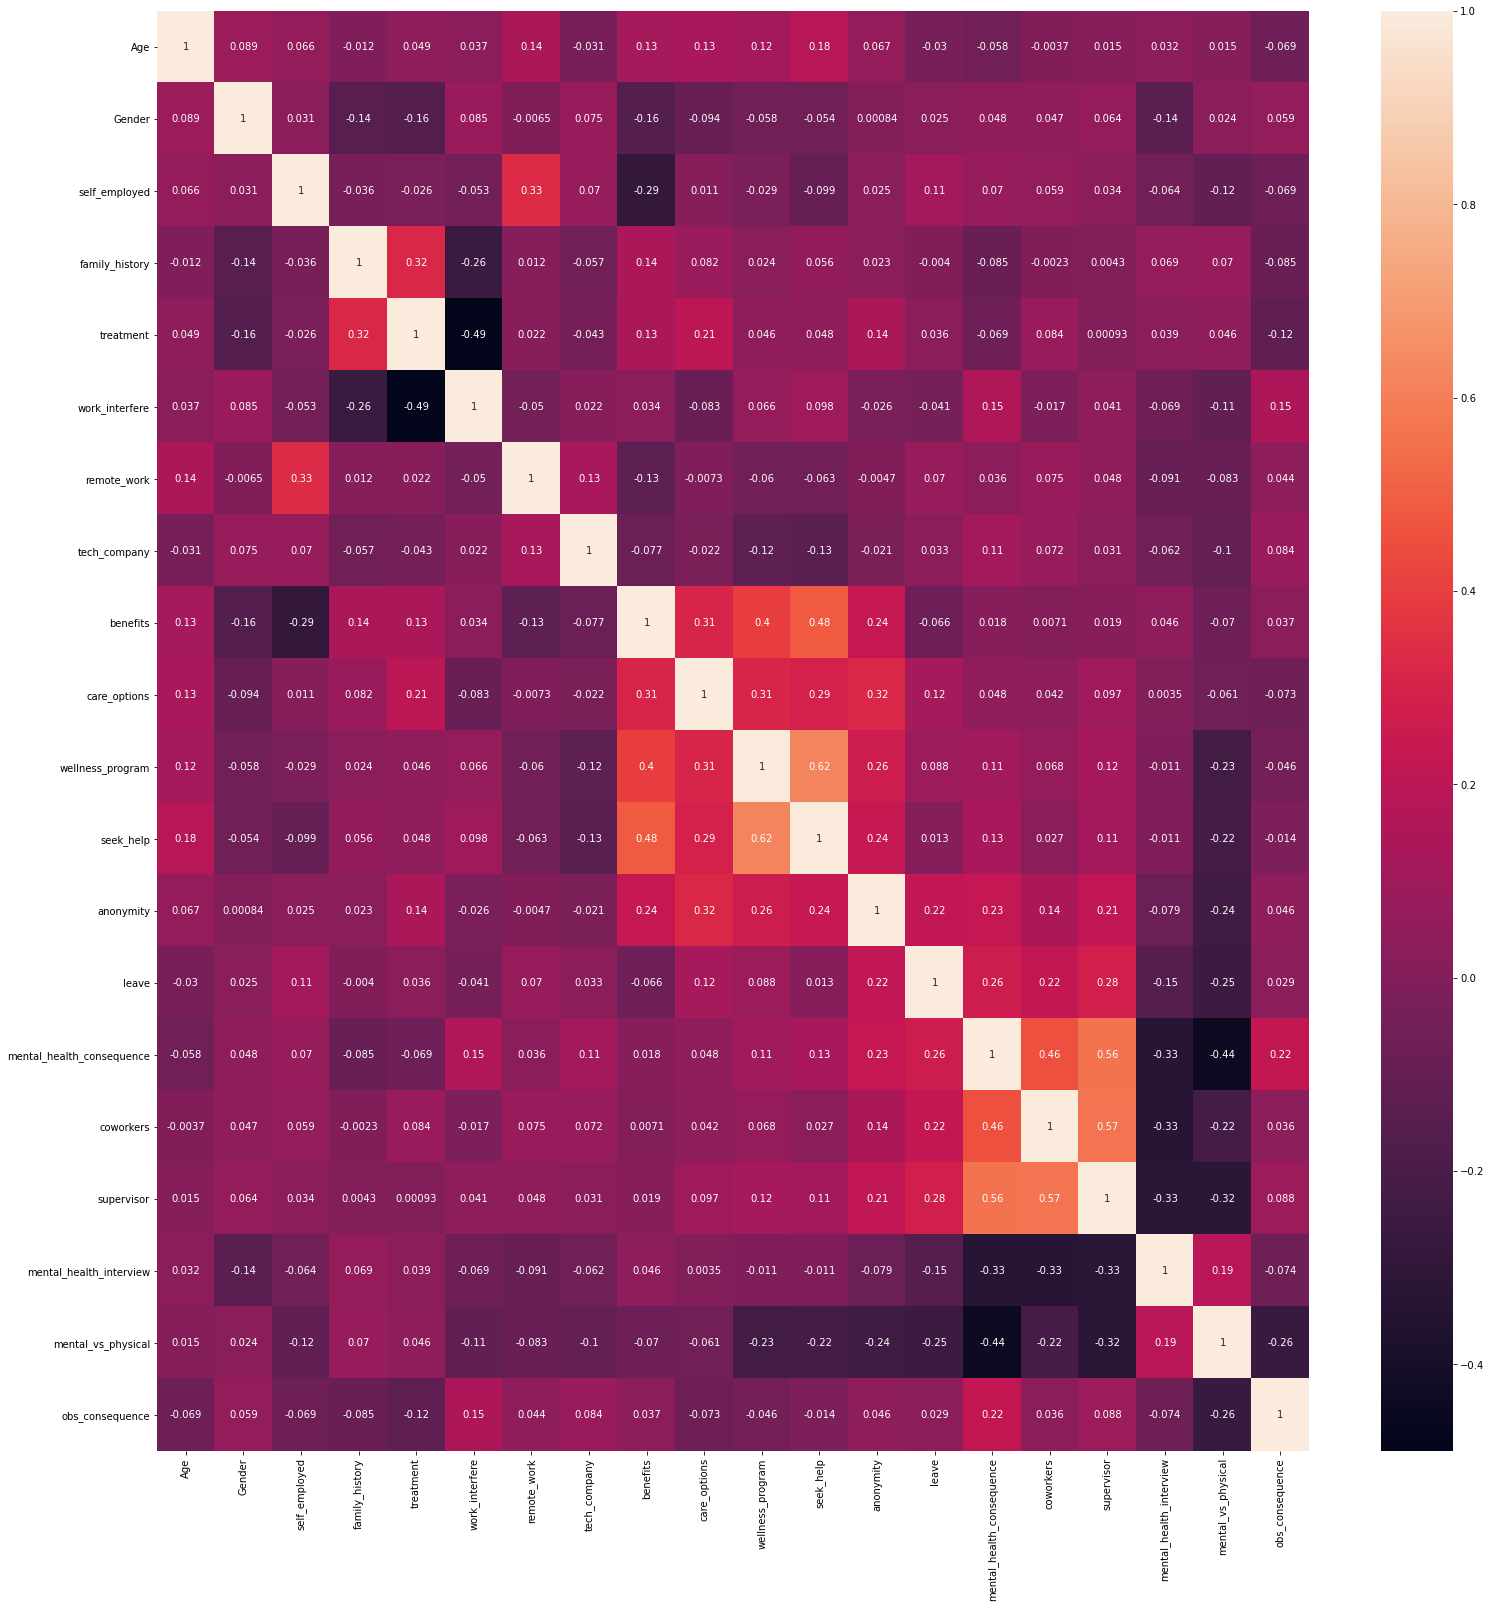

In [101]:
corr = df3.corr()

fig = plt.figure(figsize=(20,20))
axes = fig.add_axes([0,0,1,1])
sns.heatmap(corr,annot=True)

In [25]:
df3.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence
0,37,0,0,0,1,1.0,0,1,2,1,0,2,2,3,2,1,2,2,0,1
1,44,1,0,0,0,3.0,0,0,1,0,1,1,1,0,1,0,0,2,1,1
2,32,1,0,0,0,3.0,0,1,0,0,0,0,1,2,2,2,2,0,2,1
3,31,1,0,1,1,1.0,0,1,0,2,0,0,0,2,0,1,0,1,2,0
4,31,1,0,0,0,4.0,1,1,2,0,1,1,1,0,2,1,2,0,1,1


## EDA

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

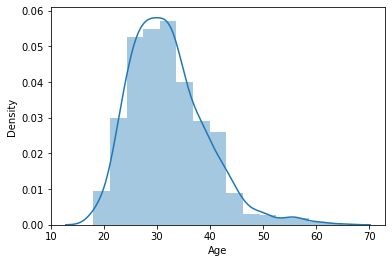

In [26]:
sns.distplot(df3.Age,kde = True , bins = 15)
# dist of Age 

<AxesSubplot:xlabel='mental_health_consequence', ylabel='count'>

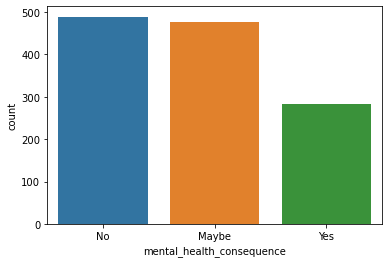

In [27]:
sns.countplot(x = 'mental_health_consequence',data = df)

<AxesSubplot:xlabel='treatment', ylabel='count'>

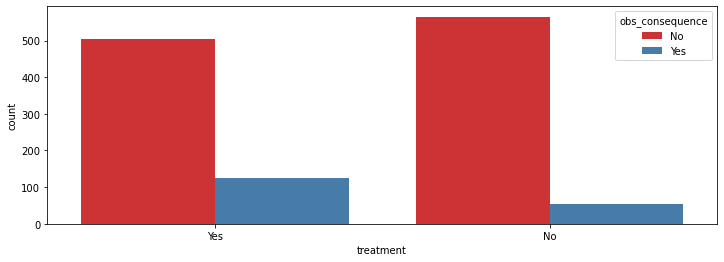

In [28]:
plt.figure(figsize=(12,4))
sns.countplot(x = 'treatment',data = df,palette="Set1",hue = 'obs_consequence')    

<AxesSubplot:xlabel='leave', ylabel='count'>

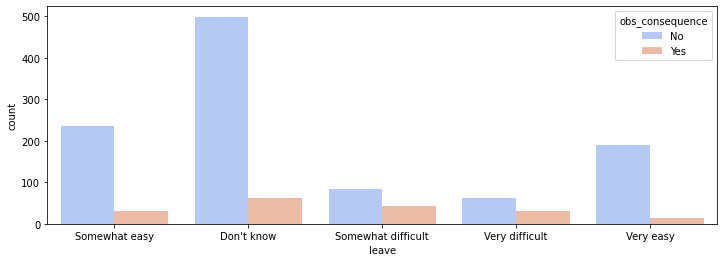

In [29]:
plt.figure(figsize=(12,4))
sns.countplot(x = 'leave',data = df,hue='obs_consequence',palette='coolwarm')

## Handle missing values

In [30]:
df3.isnull().sum()
# 263 Na's in our data set (we want to delete them because they're not much)

Age                            0
Gender                         0
self_employed                  0
family_history                 0
treatment                      0
work_interfere               263
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
coworkers                      0
supervisor                     0
mental_health_interview        0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [31]:
df3.dropna(inplace = True)

In [32]:
df3.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
coworkers                    0
supervisor                   0
mental_health_interview      0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [33]:
df3.shape # our data frame shape after deletting NAs 

(986, 20)

## Handle duplicate Data

In [34]:
df3.duplicated().sum()
# 3 duplicated rows

3

In [35]:
df3.drop_duplicates(inplace = True) # delete the 3 rows

In [36]:
df3.shape # our data frame shape after deletting na s 

(983, 20)

In [37]:
df3 = df3.astype(int)

In [38]:
df3.dtypes 

Age                          int32
Gender                       int32
self_employed                int32
family_history               int32
treatment                    int32
work_interfere               int32
remote_work                  int32
tech_company                 int32
benefits                     int32
care_options                 int32
wellness_program             int32
seek_help                    int32
anonymity                    int32
leave                        int32
mental_health_consequence    int32
coworkers                    int32
supervisor                   int32
mental_health_interview      int32
mental_vs_physical           int32
obs_consequence              int32
dtype: object

## Handle outlier data

<AxesSubplot:>

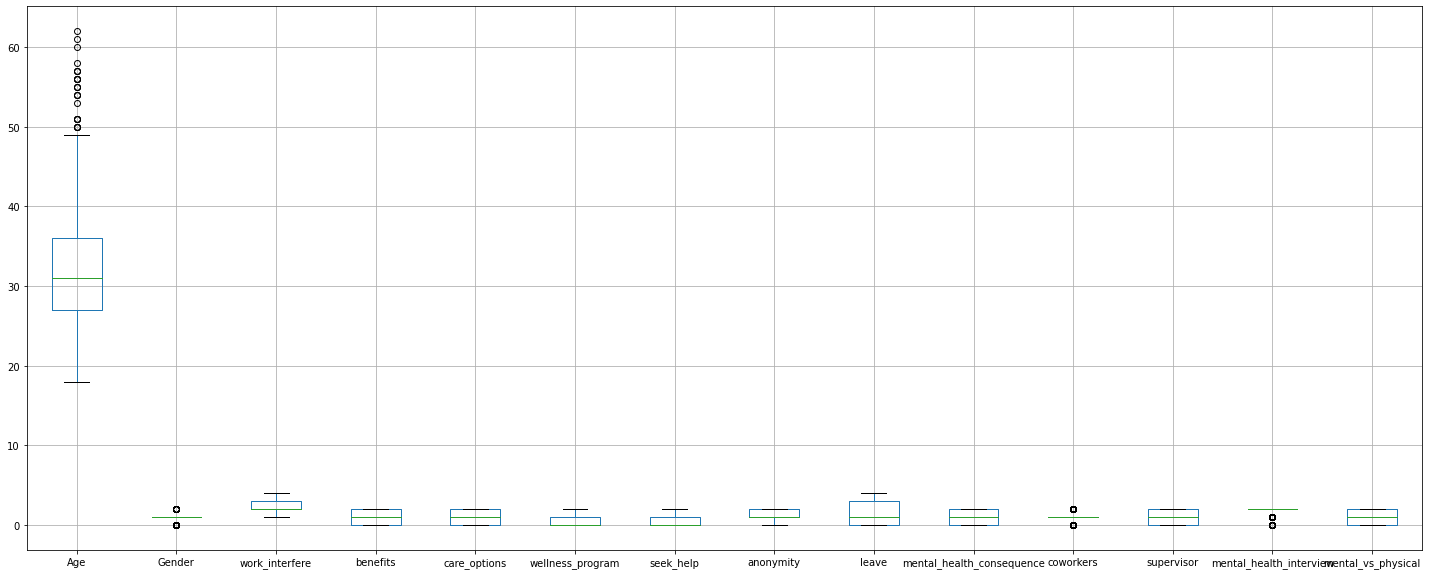

In [39]:
plt.figure(figsize=(25,10))
df3.iloc[:,[0,1,5,8,9,10,11,12,13,14,15,16,17,18]].boxplot()

<AxesSubplot:>

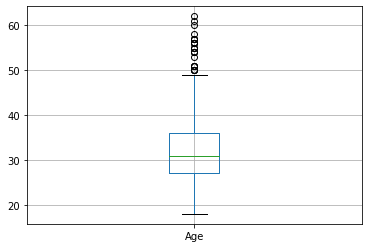

In [40]:
df3.boxplot(column = 'Age')

In [41]:
# handle the outlier datas in age variable
Q1 = df3.iloc[:,0].quantile(0.25)
Q3 = df3.iloc[:,0].quantile(0.75)

LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)

print(LB,UB) # upper bound and lower bound of Age

13.5 49.5


In [42]:
print(np.where(df3['Age']>49.5 )) # show index

(array([229, 266, 287, 324, 361, 366, 370, 388, 404, 409, 449, 475, 497,
       506, 515, 655, 663, 682, 687, 693, 728, 737, 857, 901, 924, 963],
      dtype=int64),)


In [43]:
print(np.where(df3['Age']<13.5 )) # show index

(array([], dtype=int64),)


In [44]:
dataframe = df3[(df3["Age"]<=49.5) & (df3["Age"]>=13.5 )]
dataframe.shape 

(957, 20)

## Handle imbalanced Data

In [45]:
dataframe['obs_consequence'].value_counts()
# As you can see our response value is not balanced

1    801
0    156
Name: obs_consequence, dtype: int64

In [46]:
##smote method for imbalancing

#import imblearn library
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# spliting x and y for SMOTE method
x = dataframe.iloc[:,:-1]  #predictors
y = dataframe.iloc[:,[-1]] #response variable

#fit smote method for x and y 
x_smote,y_smote = smote.fit_resample(x,y)

print("Original dataset shape", y.shape)
print("Resmaple dataset shape", y_smote.shape)



Original dataset shape (957, 1)
Resmaple dataset shape (1602, 1)


In [47]:
#evaluate a new dataframe with x_smote and y_smote
x_smote_df = pd.DataFrame(x_smote, columns = x.columns)
y_smote_df = pd.DataFrame(y_smote, columns= y.columns)

data_smote1 = pd.concat([x_smote_df, y_smote_df], axis = 1) 
data_smote1

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence
0,37,0,0,0,1,1,0,1,2,1,0,2,2,3,2,1,2,2,0,1
1,44,1,0,0,0,3,0,0,1,0,1,1,1,0,1,0,0,2,1,1
2,32,1,0,0,0,3,0,1,0,0,0,0,1,2,2,2,2,0,2,1
3,31,1,0,1,1,1,0,1,0,2,0,0,0,2,0,1,0,1,2,0
4,31,1,0,0,0,4,1,1,2,0,1,1,1,0,2,1,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,35,0,0,1,1,2,0,1,0,2,0,0,2,3,0,1,1,1,0,0
1598,36,0,0,0,1,2,0,0,0,2,0,0,0,0,2,0,0,2,1,0
1599,32,1,0,0,1,2,0,1,0,2,2,2,2,3,1,1,1,2,1,0
1600,36,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,2,1,0


In [48]:
data_smote1['obs_consequence'].value_counts()

0    801
1    801
Name: obs_consequence, dtype: int64

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x1=data_smote1.iloc[:,[0,1,5,8,9,10,11,12,13,14,15,16,17,18]]
y1=data_smote1.iloc[:,[2,3,4,6,7,19]]
x_mm=scaler.fit_transform(x1)
mm_df=pd.DataFrame(x_mm,columns=x1.columns)
data_smote = pd.concat([mm_df,y1], axis = 1) 
data_smote

,Age,Gender,work_interfere,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,self_employed,family_history,treatment,remote_work,tech_company,obs_consequence
0,0.612903,0.0,0.000000,1.0,0.5,0.0,1.0,1.0,0.75,1.0,0.5,1.0,1.0,0.0,0,0,1,0,1,1
1,0.838710,0.5,0.666667,0.5,0.0,0.5,0.5,0.5,0.00,0.5,0.0,0.0,1.0,0.5,0,0,0,0,0,1
2,0.451613,0.5,0.666667,0.0,0.0,0.0,0.0,0.5,0.50,1.0,1.0,1.0,0.0,1.0,0,0,0,0,1,1
3,0.419355,0.5,0.000000,0.0,1.0,0.0,0.0,0.0,0.50,0.0,0.5,0.0,0.5,1.0,0,1,1,0,1,0
4,0.419355,0.5,1.000000,1.0,0.0,0.5,0.5,0.5,0.00,1.0,0.5,1.0,0.0,0.5,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,0.548387,0.0,0.333333,0.0,1.0,0.0,0.0,1.0,0.75,0.0,0.5,0.5,0.5,0.0,0,1,1,0,1,0
1598,0.580645,0.0,0.333333,0.0,1.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,1.0,0.5,0,0,1,0,0,0
1599,0.451613,0.5,0.333333,0.0,1.0,1.0,1.0,1.0,0.75,0.5,0.5,0.5,1.0,0.5,0,0,1,0,1,0
1600,0.580645,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.5,0.0,1.0,0.5,0,0,1,0,1,0


In [50]:
# Splitting the dataset (data_smote) to test and train 
X = data_smote.iloc[:, :-1]
Y = data_smote.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)


# Evaluate the classification models

## K-nearest neighbors 

In [102]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

{'metric': 'manhattan', 'n_neighbors': 3}
0.8269325396825398
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       227
           1       0.89      0.69      0.78       254

    accuracy                           0.79       481
   macro avg       0.81      0.80      0.79       481
weighted avg       0.81      0.79      0.79       481

0.7920997920997921
random pred is  0.5
knn test auc 0.8623521454091367


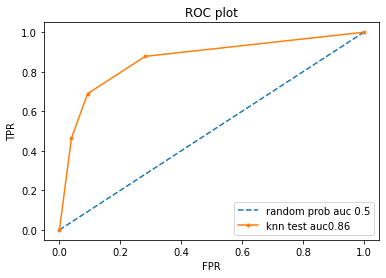

In [131]:
from sklearn.model_selection import GridSearchCV
param_dist = {
    'n_neighbors' : [3,5,7,11,13,15],
    'metric': ['euclidean','manhattan']
}

clf = GridSearchCV(KNeighborsClassifier(),param_dist,cv = 5)

gs = clf.fit(X_train,Y_train)
gs_pred = clf.predict(X_test)
print(gs.best_params_)
print(gs.best_score_)
print(classification_report(Y_test,gs_pred))
print(accuracy_score(Y_test,gs_pred))

#ROC curve 

#step 1 (prediction probs)

r_probs = [0 for i in range(len(Y_test))]
knn_prob_test = gs.predict_proba(X_test)


knn_prob_test = knn_prob_test[:,1]



r_auc = roc_auc_score(Y_test,r_probs)
knn_auc_test = roc_auc_score(Y_test,knn_prob_test)


print('random pred is ',r_auc)
print('knn test auc',knn_auc_test)



#step 2 (calc ROC curve)

r_fpr,r_tpr,i = roc_curve(Y_test,r_probs)
r_fpr1,r_tpr1,i = roc_curve(Y_test,knn_prob_test)



# step 3 (plot)

plt.plot(r_fpr,r_tpr,label = f"random prob auc {r_auc}",linestyle = '--')
plt.plot(r_fpr1,r_tpr1,label = f'knn test auc{round(knn_auc_test,2)}',marker = '.')


plt.title('ROC plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

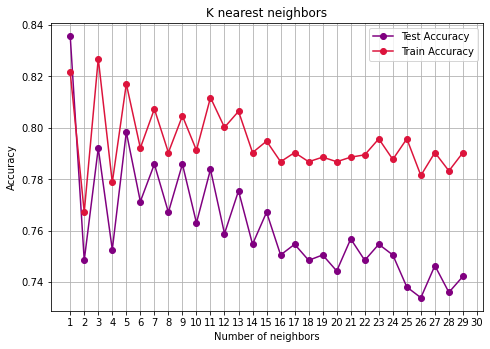

0.8001587301587302

In [53]:
from sklearn.model_selection import cross_val_score
neighbors = np.arange(1,30)
test_acc = np.empty(len(neighbors))
cv_acc = np.empty(len(neighbors))
test_recall =np.empty(len(neighbors))
test_precision =np.empty(len(neighbors))


for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors= k,metric = 'manhattan')
    cv = cross_val_score(knn,cv = 5,X= X_train,y=Y_train)
    knn.fit(X_train,Y_train)
    pred = knn.predict(X_test)
    cv_acc[i] = cv.mean()
    test_acc[i] = knn.score(X_test,Y_test)
    
    


    
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

axes.plot(neighbors,test_acc,label = 'Test Accuracy',marker = 'o',color = 'purple'  )

axes.plot(neighbors,cv_acc,label = 'Train Accuracy',marker = 'o' ,color = 'crimson')

axes.legend()
axes.grid()
axes.set_xlabel('Number of neighbors')
axes.set_ylabel('Accuracy')
axes.set_title('K nearest neighbors')
plt.xticks([j for j in range(1,31)])
plt.show()

cv_acc[11]

In [54]:
error=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0.5, 1.0, 'Error Rate')

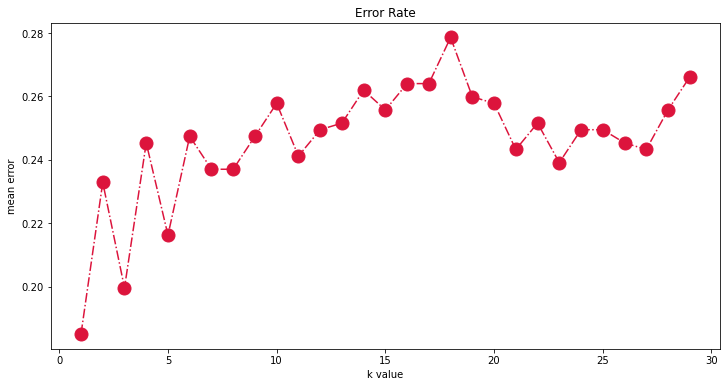

In [55]:
#show the error plot to choose the best k 
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color="crimson",linestyle="-.",marker="o",markersize=13)
plt.xlabel("k value")
plt.ylabel("mean error")
plt.title("Error Rate")

In [56]:
#evaluate of the KNN algorithm
from sklearn.model_selection import cross_val_score
knn2 = KNeighborsClassifier(n_neighbors=11,metric="manhattan" )
knn2.fit(X_train,Y_train)
knn_pred = knn2.predict(X_test)

#accuracy of model (test and train)
acc = accuracy_score(Y_test, knn_pred)
#acc_t=knn2.score(X_train, Y_train)
estimator=cross_val_score(estimator=knn2 , X=X_train , y=Y_train , cv=30)


#Classifiction (KNN) Report 
print("Test Accuracy is :", acc)
print("K_fold cross validation is : " ,estimator.mean())
print(confusion_matrix(Y_test,knn_pred))
print(classification_report(Y_test,knn_pred))

Test Accuracy is : 0.7837837837837838
K_fold cross validation is :  0.8208629682313894
[[200  27]
 [ 77 177]]
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       227
           1       0.87      0.70      0.77       254

    accuracy                           0.78       481
   macro avg       0.79      0.79      0.78       481
weighted avg       0.80      0.78      0.78       481



# Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

## evaluate a model 

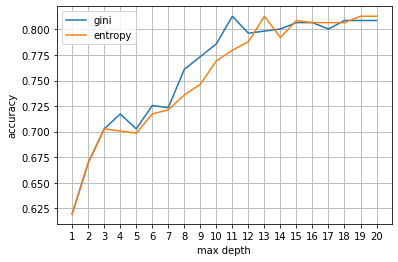

In [58]:
max_depth  = [] 
acc_gini = []
acc_entropy = []
for i in range(1,21):
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=i,random_state=42)
    
    dtree.fit(X_train,Y_train)
    pred = dtree.predict(X_test)
    acc_gini.append(accuracy_score(Y_test,pred))
   

    
    dtree = DecisionTreeClassifier(criterion='entropy',max_depth=i,random_state=42)
    dtree.fit(X_train,Y_train)
    pred = dtree.predict(X_test)
    acc_entropy.append(accuracy_score(Y_test,pred))
    


    max_depth.append(i)

dtreedf = pd.DataFrame({"acc_gini" : pd.Series(acc_gini),
                   "acc_entropy" : pd.Series(acc_entropy), 
                   "max_depth" : pd.Series(max_depth)})

plt.plot("max_depth", "acc_gini", data = dtreedf, label = "gini")
plt.plot("max_depth", "acc_entropy", data = dtreedf, label = "entropy")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.xticks([j for j in range(1,21)])
plt.legend()
plt.grid()




[[200  27]
 [ 77 177]]
Test Accuracy is : 0.8066528066528067
K_fold cross validation is :  0.7858650793650794
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       227
           1       0.87      0.70      0.77       254

    accuracy                           0.78       481
   macro avg       0.79      0.79      0.78       481
weighted avg       0.80      0.78      0.78       481

random pred is  0.5
dt test auc 0.8075548926428249


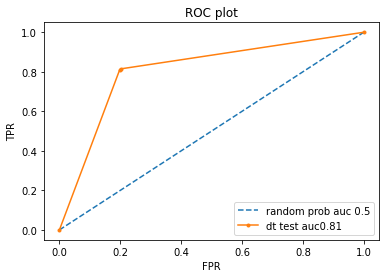

In [130]:
#Evaluate a DT for best max depth
bestclassifier = DecisionTreeClassifier(criterion =  "entropy", max_depth =18,random_state=42)
bestclassifier.fit(X_train, Y_train)
pred_dt = bestclassifier.predict(X_test)


#accuracy of model (test and train)
acc = accuracy_score(Y_test, pred_dt)
estimator=cross_val_score(estimator=bestclassifier, X=X_train , y=Y_train , cv=5)
#Classifiction (KNN) Report 


print(confusion_matrix(Y_test,knn_pred))
print("Test Accuracy is :", acc)
print("K_fold cross validation is : " ,estimator.mean())
print(classification_report(Y_test,knn_pred))

#Roc curve
r_probs = [0 for i in range(len(Y_test))]
dt_prob_test = bestclassifier.predict_proba(X_test)


dt_prob_test = dt_prob_test[:,1]



r_auc = roc_auc_score(Y_test,r_probs)
dt_auc_test = roc_auc_score(Y_test,dt_prob_test)


print('random pred is ',r_auc)
print('dt test auc',dt_auc_test)
 


#step 2 (calc ROC curve)

r_fpr,r_tpr,i = roc_curve(Y_test,r_probs)
r_fpr1,r_tpr1,i = roc_curve(Y_test,dt_prob_test)



# step 3 (plot)

plt.plot(r_fpr,r_tpr,label = f"random prob auc {r_auc}",linestyle = '--')
plt.plot(r_fpr1,r_tpr1,label = f'dt test auc{round(dt_auc_test,2)}',marker = '.')


plt.title('ROC plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

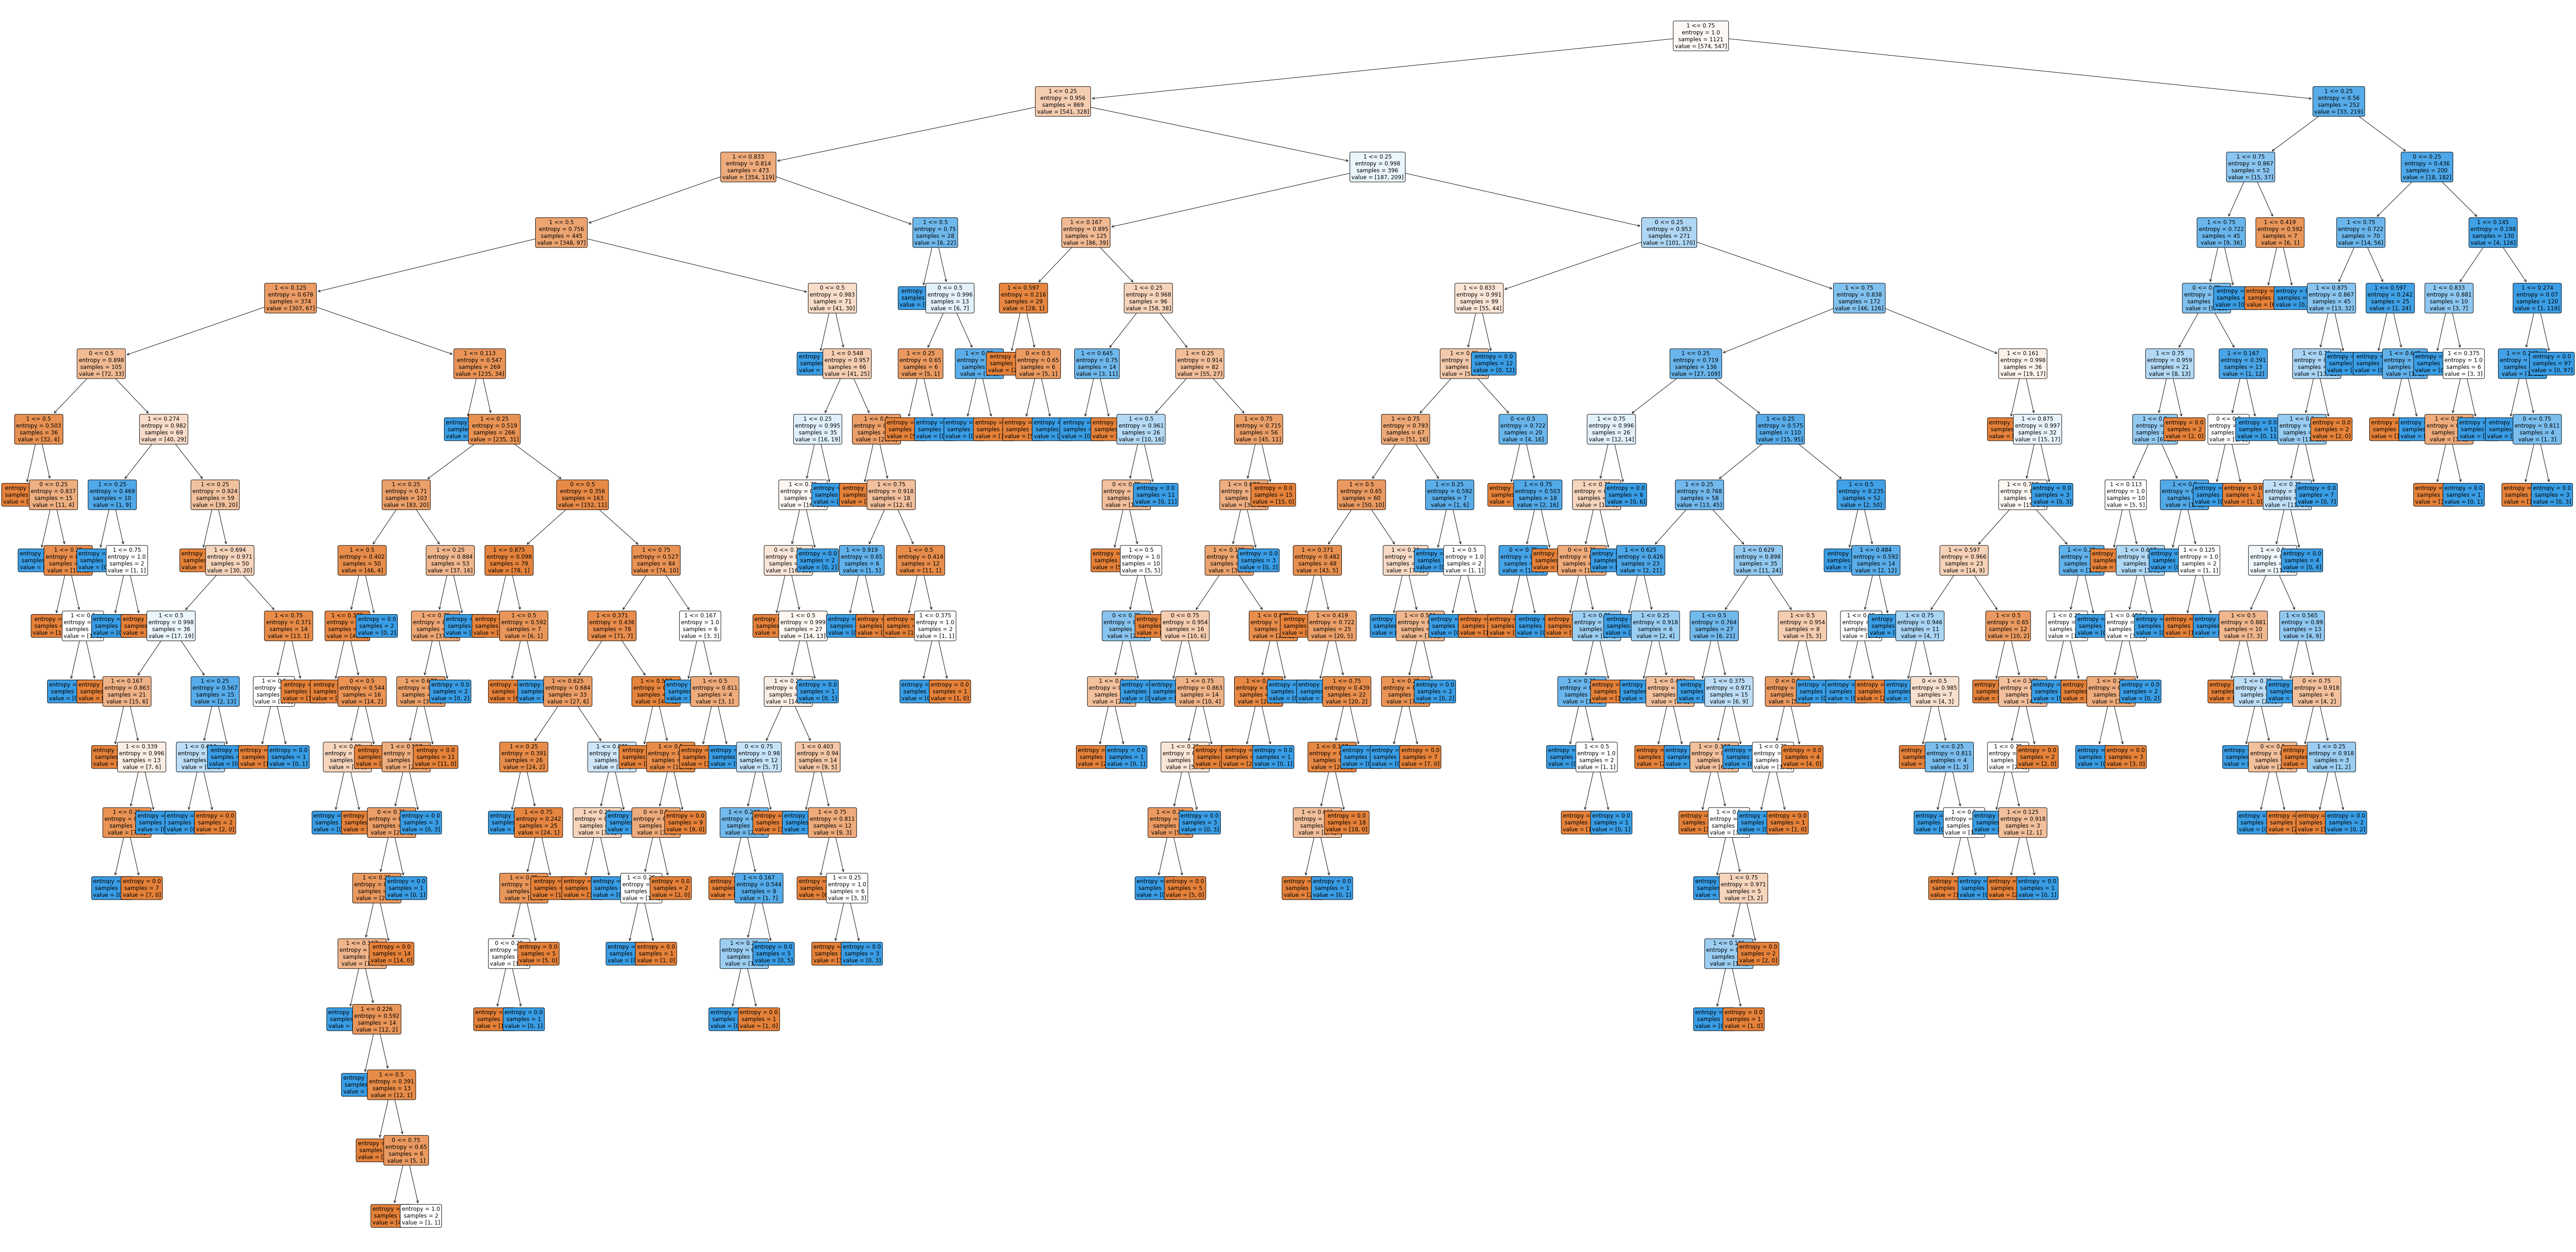

In [60]:
from sklearn.tree import plot_tree
plt.figure(figsize = (100,50))
plot_tree(bestclassifier,feature_names = data_smote.iloc[:,-1],filled =True, fontsize=12,rounded=True,impurity=True)
plt.show()

Text(0.5, 1.0, 'Error Rate')

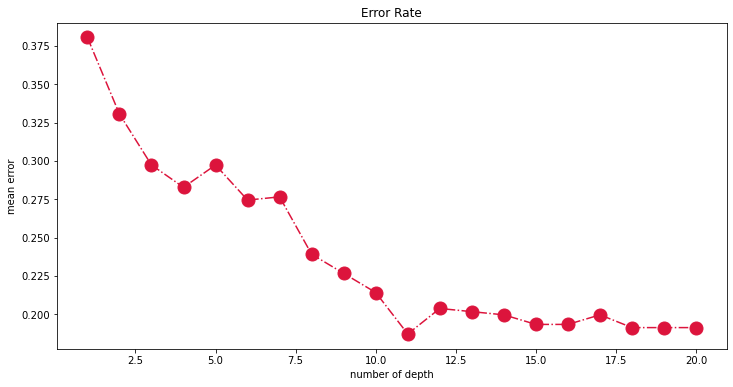

In [61]:
error=[]

for i in range(1,21):
    DT=DecisionTreeClassifier(criterion='gini',max_depth = i,random_state=42)
    DT.fit(X_train,Y_train)
    pred_i=DT.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,21),error,color="crimson",linestyle="-.",marker="o",markersize=13)

plt.xlabel("number of depth")
plt.ylabel("mean error")
plt.title("Error Rate")


Text(0.5, 1.0, 'Error Rate of entropy')

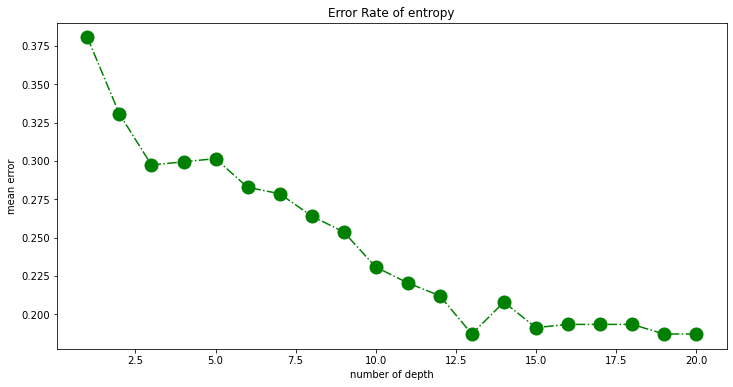

In [62]:
error=[]

for i in range(1,21):
    DT=DecisionTreeClassifier(criterion='entropy',max_depth = i,random_state=42)
    DT.fit(X_train,Y_train)
    pred_i=DT.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,21),error,color="green",linestyle="-.",marker="o",markersize=13)

plt.xlabel("number of depth")
plt.ylabel("mean error")
plt.title("Error Rate of entropy")


## support vector machines  

### support vector machine model one (kernel = linear )

In [63]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [64]:
svclassifier_linear = SVC(kernel="linear")
svclassifier_linear.fit(X_train,Y_train) 
prediction = svclassifier_linear.predict(X_test)

estimator=cross_val_score(estimator=svclassifier_linear, X=X_train , y=Y_train , cv=5)

In [65]:
print(f"the accuracy score of test set is : {round(accuracy_score(Y_test,prediction, normalize=True),2)}")

print(f'the accuracy score of cv is : {round(estimator.mean(),2)}')

the accuracy score of test set is : 0.75
the accuracy score of cv is : 0.79


### support vector machine model two (kernel = rbf)

In [66]:
svclassifier_rbf = SVC(kernel="rbf")
svclassifier_rbf.fit(X_train,Y_train) 
prediction_rbf = svclassifier_rbf.predict(X_test)

estimator2=cross_val_score(estimator=svclassifier_rbf, X=X_train , y=Y_train , cv=5)

In [67]:
print(f"the accuracy score of test set is : {round(accuracy_score(Y_test,prediction_rbf, normalize=True),2)}")

print(f'the accuracy score of train set is : {round(estimator2.mean(),2)}')

the accuracy score of test set is : 0.79
the accuracy score of train set is : 0.83


### support vector machine model three (kernel = sigmoid)

In [68]:
svclassifier_sig = SVC(kernel="sigmoid")
svclassifier_sig.fit(X_train,Y_train) 
prediction_sig = svclassifier_sig.predict(X_test)

estimator3=cross_val_score(estimator=svclassifier_sig, X=X_train , y=Y_train , cv=5)

In [69]:
print(f"the accuracy score of test set is : {round(accuracy_score(Y_test,prediction_sig, normalize=True),2)}")

print(f'the accuracy score of train set is : {round(estimator3.mean(),2)}')

the accuracy score of test set is : 0.48
the accuracy score of train set is : 0.52


### support vector machine model four (kernel = polynomial)

In [70]:
svclassifier_poly = SVC(kernel="poly")
svclassifier_poly.fit(X_train,Y_train) 
prediction_poly = svclassifier_poly.predict(X_test)

estimator4=cross_val_score(estimator=svclassifier_poly, X=X_train , y=Y_train , cv=5)

In [71]:
print(f"the accuracy score of test set is : {round(accuracy_score(Y_test,prediction_poly, normalize=True),2)}")

print(f'the accuracy score of train set is : {round(estimator4.mean(),2)}')

the accuracy score of test set is : 0.78
the accuracy score of train set is : 0.82


In [122]:
# grid search for SVM (also used cross validation score )
param_dist = {
    'kernel':['linear','rbf','sigmoid','poly'],
    'C':[0.1,1,10,100],
    'gamma' : [0.1,1,10,100]

}

clf = GridSearchCV(SVC(),param_dist,cv = 5)

gs = clf.fit(X_train,Y_train)
gs_pred = clf.predict(X_test)
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)
print(classification_report(Y_test,gs_pred))
print(accuracy_score(Y_test,gs_pred))





SVC(C=10, gamma=1)
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.8572857142857144
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       227
           1       0.85      0.83      0.84       254

    accuracy                           0.83       481
   macro avg       0.83      0.83      0.83       481
weighted avg       0.83      0.83      0.83       481

0.8336798336798337


## DT modeling with hyperparameter tuning cross validation

In [73]:
param_dist = {
    'max_depth':[1,10,50,100,150,200],
    'criterion' : ['gini','entropy']
}


clf = GridSearchCV(DecisionTreeClassifier(),param_dist,cv = 5)

gs = clf.fit(X_train,Y_train)
gs_pred = clf.predict(X_test)
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)
print(classification_report(Y_test,gs_pred))
print(accuracy_score(Y_test,gs_pred))


DecisionTreeClassifier(max_depth=200)
{'criterion': 'gini', 'max_depth': 200}
0.7975198412698412
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       227
           1       0.82      0.78      0.80       254

    accuracy                           0.79       481
   macro avg       0.79      0.80      0.79       481
weighted avg       0.80      0.79      0.79       481

0.7941787941787942


# Ensemble learners models 

##  Bagging 1 (with cross validation )

In [74]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

In [75]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)


In [76]:
bgclass = BaggingClassifier(base_estimator=SVC(kernel='linear',C = 1),random_state=42)
scores = cross_val_score(bgclass,X_train,Y_train,cv = kf ,scoring='accuracy')



bgclass.fit(X_train,Y_train)
bgclass.predict(X_test)

print(scores)
print(scores.mean())
print(bgclass.score(X_test,Y_test))




[0.82666667 0.79464286 0.78125    0.79910714 0.77678571]
0.7956904761904762
0.7525987525987526


In [77]:

bagclass=BaggingClassifier(DecisionTreeClassifier(criterion="entropy",max_depth=15,random_state=42))
scores_array=cross_val_score(bagclass,X_train,Y_train,cv=kf,scoring="accuracy")

bgclass.fit(X_train,Y_train)
bgclass.predict(X_test)

print(scores_array)
print(scores_array.mean())
print(bgclass.score(X_test,Y_test))

[0.81777778 0.82142857 0.80357143 0.8125     0.83928571]
0.8189126984126984
0.7525987525987526


In [78]:
bagclass=BaggingClassifier(KNeighborsClassifier(n_neighbors=11),random_state=42)
scores_array=cross_val_score(bagclass,X_train,Y_train,cv=kf,scoring="accuracy")

bgclass.fit(X_train,Y_train)
bgclass.predict(X_test)


print(scores_array)
print(scores_array.mean())
print(bgclass.score(X_test,Y_test))

[0.77777778 0.74553571 0.79017857 0.79017857 0.80357143]
0.7814484126984127
0.7525987525987526


In [79]:
bagclass=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)
scores_array=cross_val_score(bagclass,X_train,Y_train,cv=kf,scoring="accuracy")

bgclass.fit(X_train,Y_train)
bgclass.predict(X_test)



print(scores_array)
print(scores_array.mean())
print(bgclass.score(X_test,Y_test))

[0.86222222 0.84821429 0.85714286 0.86160714 0.87946429]
0.8617301587301588
0.7525987525987526


# Bagging 2

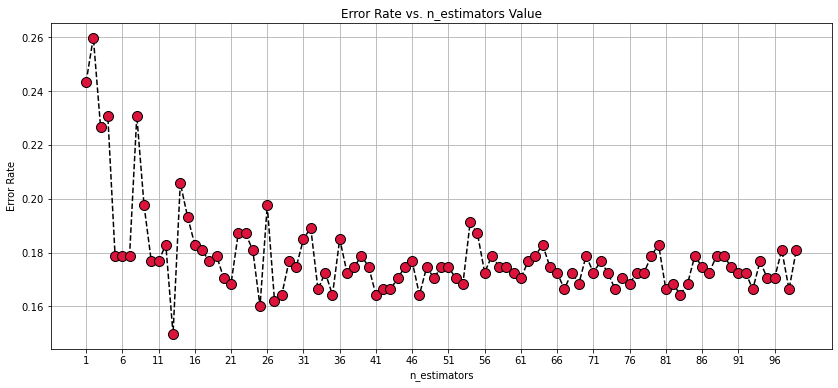

In [80]:
error_rate=[]
for i in range(1,100):
        iteration_error=[]
        bag = BaggingClassifier(n_estimators=i)
        bag.fit(X_train,Y_train)
        pred_i = bag.predict(X_test)
        iteration_error.append(np.mean(pred_i != Y_test))
        error_rate.append(np.mean(iteration_error))
plt.figure(figsize=(14,6))
plt.plot(range(1,100),error_rate,color='black', linestyle='dashed', marker='o',markerfacecolor='crimson', markersize=10)
plt.title('Error Rate vs. n_estimators Value')
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')
plt.xticks([j for j in range(1,101,5)])
plt.grid()
plt.show()

([<matplotlib.axis.XTick at 0x1d35851bbb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

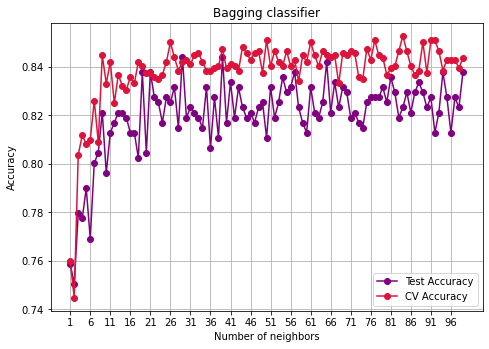

In [81]:
n_est = np.arange(1,100)
test_acc = np.empty(len(n_est))
cv_acc = np.empty(len(n_est))
test_recall =np.empty(len(n_est))
test_precision =np.empty(len(n_est))


for i,k in enumerate(n_est):
    bg = BaggingClassifier(n_estimators=k )
    cv = cross_val_score(bg,X_train,Y_train,cv = 5 ,scoring = 'accuracy')
    bg.fit(X_train,Y_train)
    pred = bg.predict(X_test)
    cv_acc[i] = cv.mean()
    test_acc[i] = bg.score(X_test,Y_test)
    test_recall[i] = recall_score(Y_test,pred)
    test_precision[i] = precision_score(Y_test,pred)
    


    
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

axes.plot(n_est,test_acc,label = 'Test Accuracy',marker = 'o',color = 'purple'  )

axes.plot(n_est,cv_acc,label = 'CV Accuracy',marker = 'o' ,color = 'crimson')

axes.legend()
axes.grid()
axes.set_xlabel('Number of neighbors')
axes.set_ylabel('Accuracy')
axes.set_title('Bagging classifier')
plt.xticks([j for j in range(1,101,5)])



with best n_estimators: 55
 Test Accuracy is : 0.8274428274428275
[[198  29]
 [ 54 200]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       227
           1       0.87      0.79      0.83       254

    accuracy                           0.83       481
   macro avg       0.83      0.83      0.83       481
weighted avg       0.83      0.83      0.83       481

random pred is  0.5
dt test auc 0.9130909847722779


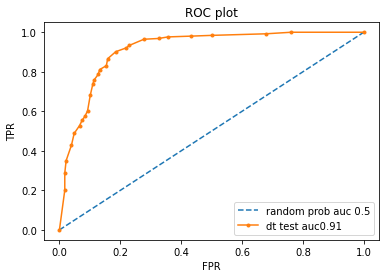

In [128]:
bag=BaggingClassifier(n_estimators=27)
bag.fit(X_train, Y_train)
bag_pred = bag.predict(X_test)
acc = accuracy_score(Y_test, bag_pred)

print('with best n_estimators: 55')
print(" Test Accuracy is :", acc)

print(confusion_matrix(Y_test,bag_pred))
print(classification_report(Y_test,bag_pred))



#Roc curve
r_probs = [0 for i in range(len(Y_test))]
bg_prob_test = bag.predict_proba(X_test)
bg_prob_train =bag.predict_proba(X_train)

bg_prob_test = bg_prob_test[:,1]



r_auc = roc_auc_score(Y_test,r_probs)
bg_auc_test = roc_auc_score(Y_test,bg_prob_test)


print('random pred is ',r_auc)
print('dt test auc',bg_auc_test)
 


#step 2 (calc ROC curve)

r_fpr,r_tpr,i = roc_curve(Y_test,r_probs)
r_fpr1,r_tpr1,i = roc_curve(Y_test,bg_prob_test)



# step 3 (plot)

plt.plot(r_fpr,r_tpr,label = f"random prob auc {r_auc}",linestyle = '--')
plt.plot(r_fpr1,r_tpr1,label = f'dt test auc{round(bg_auc_test,2)}',marker = '.')


plt.title('ROC plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

### Random forest 

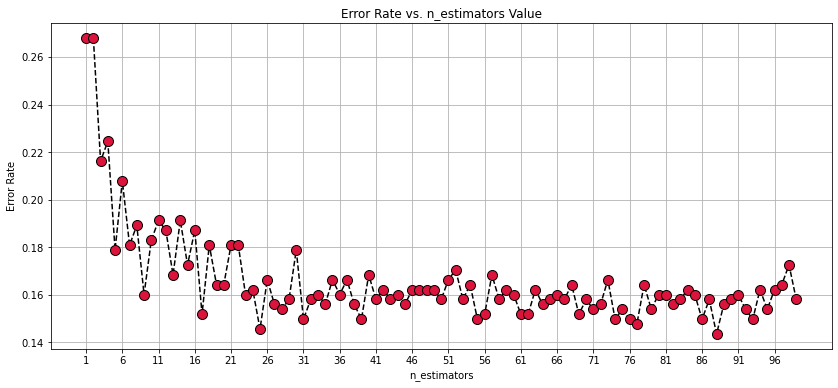

In [83]:
error_rate=[]
for i in range(1,100):
        iteration_error=[]
        RF = RandomForestClassifier(n_estimators=i)
        RF.fit(X_train,Y_train)
        pred_i = RF.predict(X_test)
        iteration_error.append(np.mean(pred_i != Y_test))
        error_rate.append(np.mean(iteration_error))
plt.figure(figsize=(14,6))
plt.plot(range(1,100),error_rate,color='black', linestyle='dashed', marker='o',markerfacecolor='crimson', markersize=10)
plt.title('Error Rate vs. n_estimators Value')
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')
plt.xticks([j for j in range(1,101,5)])
plt.grid()
plt.show()

([<matplotlib.axis.XTick at 0x1d358884c40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

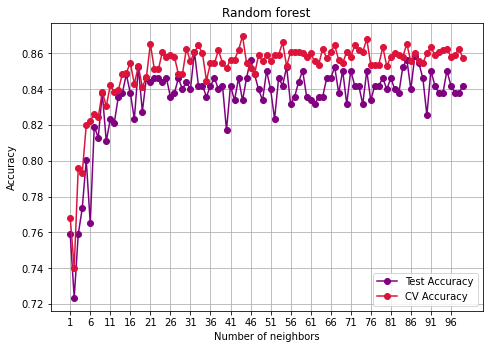

In [84]:
n_est = np.arange(1,100)
test_acc = np.empty(len(n_est))
cv_acc = np.empty(len(n_est))



for i,k in enumerate(n_est):
    RF = RandomForestClassifier(criterion='entropy',n_estimators=k ,max_depth=15)
    cv = cross_val_score(RF,X_train,Y_train,cv = 5 ,scoring = 'accuracy')
    RF.fit(X_train,Y_train)
    pred = RF.predict(X_test)
    cv_acc[i] = cv.mean()
    test_acc[i] = RF.score(X_test,Y_test)
    


    
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

axes.plot(n_est,test_acc,label = 'Test Accuracy',marker = 'o',color = 'purple'  )

axes.plot(n_est,cv_acc,label = 'CV Accuracy',marker = 'o' ,color = 'crimson')

axes.legend()
axes.grid()
axes.set_xlabel('Number of neighbors')
axes.set_ylabel('Accuracy')
axes.set_title('Random forest')
plt.xticks([j for j in range(1,101,5)])



with best n_estimators: 42
 Test Accuracy is : 0.8357588357588358
Train Accuracy is : 0.9982158786797503
[[197  30]
 [ 49 205]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       227
           1       0.87      0.81      0.84       254

    accuracy                           0.84       481
   macro avg       0.84      0.84      0.84       481
weighted avg       0.84      0.84      0.84       481

random pred is  0.5
dt test auc 0.9219709320475911
dt train auc 1.0


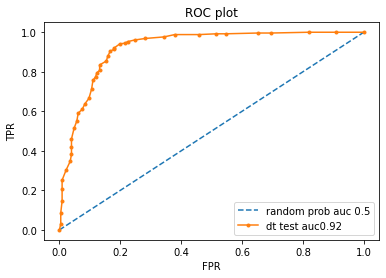

In [127]:
RF=RandomForestClassifier(n_estimators=42)
RF.fit(X_train, Y_train)
RF_pred = bag.predict(X_test)
acc = accuracy_score(Y_test,RF_pred)
acc_t=bag.score(X_train, Y_train)
print('with best n_estimators: 42')
print(" Test Accuracy is :", acc)
print(f"Train Accuracy is : {acc_t}")
print(confusion_matrix(Y_test,RF_pred))
print(classification_report(Y_test,RF_pred))



#Roc curve
r_probs = [0 for i in range(len(Y_test))]
RF_prob_test = RF.predict_proba(X_test)


RF_prob_test = RF_prob_test[:,1]



r_auc = roc_auc_score(Y_test,r_probs)
RF_auc_test = roc_auc_score(Y_test,RF_prob_test)


print('random pred is ',r_auc)
print('dt test auc',RF_auc_test)
print('dt train auc',RF_auc_train) 


#step 2 (calc ROC curve)

r_fpr,r_tpr,i = roc_curve(Y_test,r_probs)
r_fpr1,r_tpr1,i = roc_curve(Y_test,RF_prob_test)



# step 3 (plot)

plt.plot(r_fpr,r_tpr,label = f"random prob auc {r_auc}",linestyle = '--')
plt.plot(r_fpr1,r_tpr1,label = f'dt test auc{round(RF_auc_test,2)}',marker = '.')


plt.title('ROC plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

### Bagging with SVM

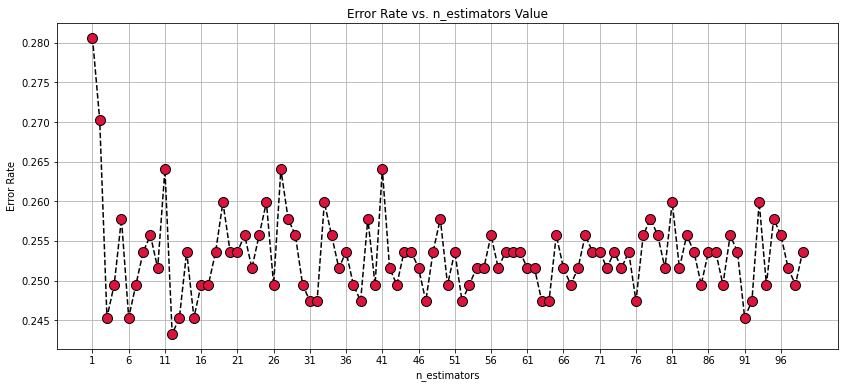

In [86]:
error_rate=[]
for i in range(1,100):
        iteration_error=[]
        bag = BaggingClassifier(base_estimator=SVC(kernel="linear"),n_estimators=i)
        bag.fit(X_train,Y_train)
        pred_i = bag.predict(X_test)
        iteration_error.append(np.mean(pred_i != Y_test))
        error_rate.append(np.mean(iteration_error))
plt.figure(figsize=(14,6))
plt.plot(range(1,100),error_rate,color='black', linestyle='dashed', marker='o',markerfacecolor='crimson', markersize=10)
plt.title('Error Rate vs. n_estimators Value')
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')
plt.xticks([j for j in range(1,101,5)])
plt.grid()
plt.show()

([<matplotlib.axis.XTick at 0x1d358617430>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

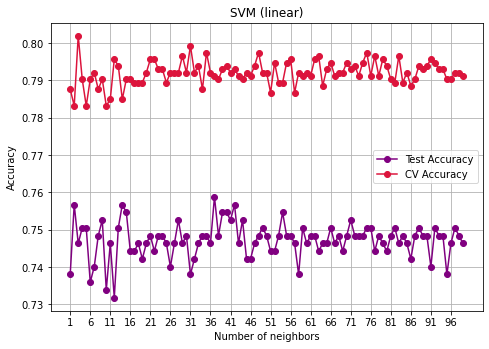

In [87]:
n_est = np.arange(1,100)
test_acc = np.empty(len(n_est))
cv_acc = np.empty(len(n_est))



for i,k in enumerate(n_est):
    bag = BaggingClassifier(SVC(kernel='linear'),n_estimators=k)
    cv = cross_val_score(bag,X_train,Y_train,cv = 5 ,scoring = 'accuracy')
    bag.fit(X_train,Y_train)
    pred = bag.predict(X_test)
    cv_acc[i] = cv.mean()
    test_acc[i] = bag.score(X_test,Y_test)
    


    
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

axes.plot(n_est,test_acc,label = 'Test Accuracy',marker = 'o',color = 'purple'  )

axes.plot(n_est,cv_acc,label = 'CV Accuracy',marker = 'o' ,color = 'crimson')

axes.legend()
axes.grid()
axes.set_xlabel('Number of neighbors')
axes.set_ylabel('Accuracy')
axes.set_title('SVM (linear)')
plt.xticks([j for j in range(1,101,5)])



In [88]:
bag=BaggingClassifier(base_estimator=SVC(kernel="linear"),n_estimators=5)
bag.fit(X_train, Y_train)
bag_pred = bag.predict(X_test)
acc = accuracy_score(Y_test, bag_pred)
cv_acc1=cv_acc[4]

print(" Test Accuracy is :", acc)
print(f"cv Accuracy is : {cv_acc1}")
print(confusion_matrix(Y_test,bag_pred))
print(classification_report(Y_test,bag_pred))

 Test Accuracy is : 0.7318087318087318
cv Accuracy is : 0.7831984126984126
[[177  50]
 [ 79 175]]
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       227
           1       0.78      0.69      0.73       254

    accuracy                           0.73       481
   macro avg       0.73      0.73      0.73       481
weighted avg       0.74      0.73      0.73       481



### bagging with knn 

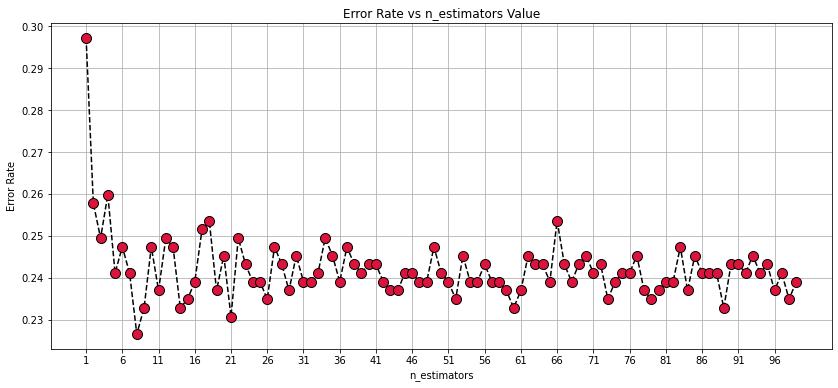

In [89]:
error_rate=[]
for i in range(1,100):
        iteration_error=[]
        bag = BaggingClassifier(KNeighborsClassifier(n_neighbors=11),n_estimators=i)
        bag.fit(X_train,Y_train)
        pred_i = bag.predict(X_test)
        iteration_error.append(np.mean(pred_i != Y_test))
        error_rate.append(np.mean(iteration_error))
plt.figure(figsize=(14,6))
plt.plot(range(1,100),error_rate,color='black', linestyle='dashed', marker='o',markerfacecolor='crimson', markersize=10)
plt.title('Error Rate vs n_estimators Value')
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')
plt.xticks([j for j in range(1,101,5)])
plt.grid()
plt.show()

([<matplotlib.axis.XTick at 0x1d3577eb5b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

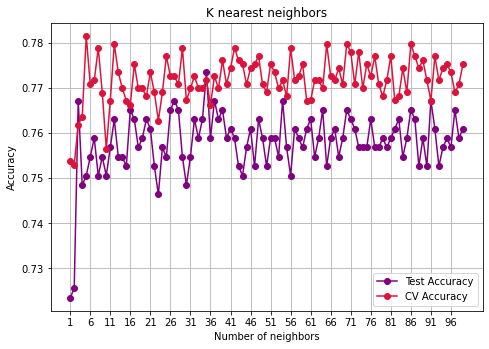

In [90]:
n_est = np.arange(1,100)
test_acc = np.empty(len(n_est))
cv_acc = np.empty(len(n_est))



for i,k in enumerate(n_est):
    bag = BaggingClassifier(KNeighborsClassifier(n_neighbors=11),n_estimators=k)
    cv = cross_val_score(bag,X_train,Y_train,cv = 5 ,scoring = 'accuracy')

    bag.fit(X_train,Y_train)
    pred = bag.predict(X_test)
    cv_acc[i] = cv.mean()
    test_acc[i] = bag.score(X_test,Y_test)
    
    


    
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

axes.plot(n_est,test_acc,label = 'Test Accuracy',marker = 'o',color = 'purple'  )

axes.plot(n_est,cv_acc,label = 'CV Accuracy',marker = 'o' ,color = 'crimson')

axes.legend()
axes.grid()
axes.set_xlabel('Number of neighbors')
axes.set_ylabel('Accuracy')
axes.set_title('K nearest neighbors')
plt.xticks([j for j in range(1,101,5)])



In [91]:
bag=BaggingClassifier(KNeighborsClassifier(n_neighbors=11),n_estimators=7,random_state=7)
bag.fit(X_train, Y_train)
bag_pred = bag.predict(X_test)
acc = accuracy_score(Y_test, bag_pred)
cv_acc1=cv_acc[6]

print(" Test Accuracy is :", acc)
print(f"Train Accuracy is : {cv_acc1}")
print(confusion_matrix(Y_test,bag_pred))
print(classification_report(Y_test,bag_pred))

 Test Accuracy is : 0.7588357588357588
Train Accuracy is : 0.7716150793650793
[[199  28]
 [ 88 166]]
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       227
           1       0.86      0.65      0.74       254

    accuracy                           0.76       481
   macro avg       0.77      0.77      0.76       481
weighted avg       0.78      0.76      0.76       481



# Boosting

In [92]:
from sklearn.ensemble import AdaBoostClassifier

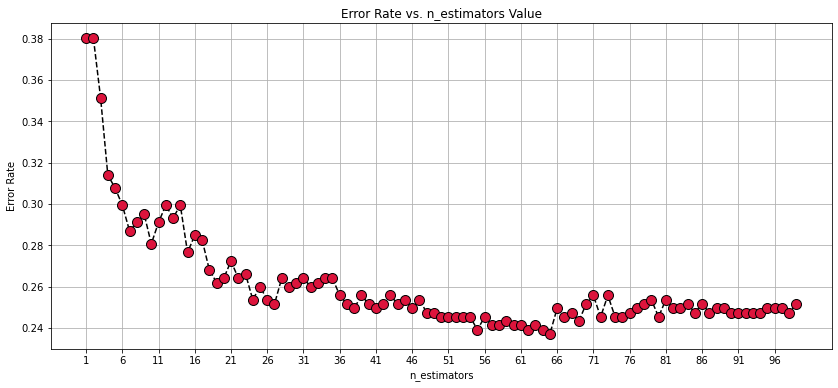

In [93]:
# Find best Parameter set
error_rate=[]
for i in range(1,100):
        iteration_error=[]
        boost= AdaBoostClassifier(n_estimators=i)
        boost.fit(X_train,Y_train)
        pred_i = boost.predict(X_test)
        iteration_error.append(np.mean(pred_i != Y_test))
        error_rate.append(np.mean(iteration_error))
        
plt.figure(figsize=(14,6))
plt.plot(range(1,100),error_rate,color='black', linestyle='dashed', marker='o',markerfacecolor='crimson', markersize=10)
plt.title('Error Rate vs. n_estimators Value')
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')
plt.xticks([j for j in range(1,101,5)])
plt.grid()
plt.show()
# from the plot it is obvious that n_estimators=52
# fit with best n_estimators parameter

([<matplotlib.axis.XTick at 0x1d355d3cdc0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

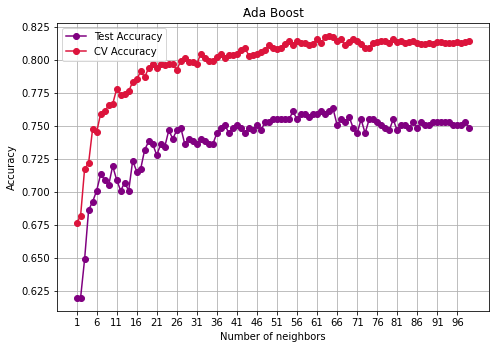

In [94]:
n_est = np.arange(1,100)
test_acc = np.empty(len(n_est))
cv_acc = np.empty(len(n_est))



for i,k in enumerate(n_est):
    AB = AdaBoostClassifier(n_estimators=k )
    cv = cross_val_score(AB,X_train,Y_train,cv = 5 ,scoring = 'accuracy')
    AB.fit(X_train,Y_train)
    pred = AB.predict(X_test)
    cv_acc[i] = cv.mean()
    test_acc[i] = AB.score(X_test,Y_test)
    
    


    
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

axes.plot(n_est,test_acc,label = 'Test Accuracy',marker = 'o',color = 'purple'  )

axes.plot(n_est,cv_acc,label = 'CV Accuracy',marker = 'o' ,color = 'crimson')

axes.legend()
axes.grid()
axes.set_xlabel('Number of neighbors')
axes.set_ylabel('Accuracy')
axes.set_title('َAda Boost')
plt.xticks([j for j in range(1,101,5)])



Test Accuracy is : 0.762993762993763
CV Accuracy is : 0.8171388888888889
[[180  47]
 [ 67 187]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       227
           1       0.80      0.74      0.77       254

    accuracy                           0.76       481
   macro avg       0.76      0.76      0.76       481
weighted avg       0.77      0.76      0.76       481

random pred is  0.5
dt test auc 0.8391203302230392


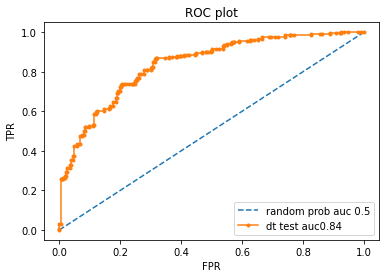

In [132]:
boost=AdaBoostClassifier(n_estimators=65)
boost.fit(X_train, Y_train)
boost_pred = boost.predict(X_test)
acc = accuracy_score(Y_test, boost_pred)
cv_acc1=cv_acc[64]


print("Test Accuracy is :", acc)
print(f"CV Accuracy is : {cv_acc1}")
print(confusion_matrix(Y_test,boost_pred))
print(classification_report(Y_test,boost_pred))


#Roc curve
r_probs = [0 for i in range(len(Y_test))]
boost_prob_test = boost.predict_proba(X_test)


boost_prob_test = boost_prob_test[:,1]



r_auc = roc_auc_score(Y_test,r_probs)
boost_auc_test = roc_auc_score(Y_test,boost_prob_test)


print('random pred is ',r_auc)
print('dt test auc',boost_auc_test)



#step 2 (calc ROC curve)

r_fpr,r_tpr,i = roc_curve(Y_test,r_probs)
r_fpr1,r_tpr1,i = roc_curve(Y_test,boost_prob_test)



# step 3 (plot)

plt.plot(r_fpr,r_tpr,label = f"random prob auc {r_auc}",linestyle = '--')
plt.plot(r_fpr1,r_tpr1,label = f'dt test auc{round(boost_auc_test,2)}',marker = '.')


plt.title('ROC plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()
